# Customer Segmentation using Machine Learning

**Final Project Submission — Celebal Technologies Internship**

*Submitted by: Harpuneet Kaur* 


*Date: 10th July 2025*


# Objective

To segment customers based on their demographic and behavioral attributes such as age, gender, income, and spending score using clustering algorithms.  
This helps businesses tailor marketing strategies effectively for each customer group.


# Dataset Information

- *Dataset Name: Mall Customers Dataset*  
- *Source:  Kaggle*  
- **Features:**
  - `CustomerID` – Unique ID assigned to the customer
  - `Gender` – Gender of the customer [Male / Female]
  - `Age` – Age of the customer
  - `Annual Income (k$)` – Income in thousands
  - `Spending Score (1-100)` – Score assigned by the mall based on customer behavior and spending nature [i.e How much they spend]

The dataset will be used to identify patterns and segment customers using unsupervised learning.


In [13]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\HK\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
!pip install pandas


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\HK\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [15]:
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\HK\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\HK\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [16]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [17]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\HK\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [18]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [19]:
# 2. Load dataset
# You can use Mall Customers dataset or your custom CSV
df = pd.read_csv('C:/Users/HK/Documents/celebal/customer-segmentation-project/data/Mall_Customers.csv')

In [20]:
# 3. Explore dataset
print(df.head())
print(df.info())
print(df.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

In [21]:
# 4. Preprocessing
# Rename columns 
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}, inplace=True)

# Drop irrelevant columns (e.g., CustomerID)
df = df.drop('CustomerID', axis=1)

# Convert categorical data if needed (e.g., Gender)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

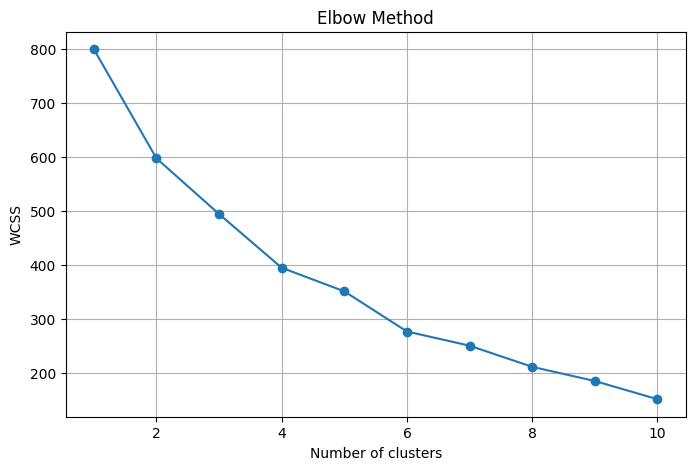

In [22]:
# 5. Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# 6. Elbow Method to determine optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


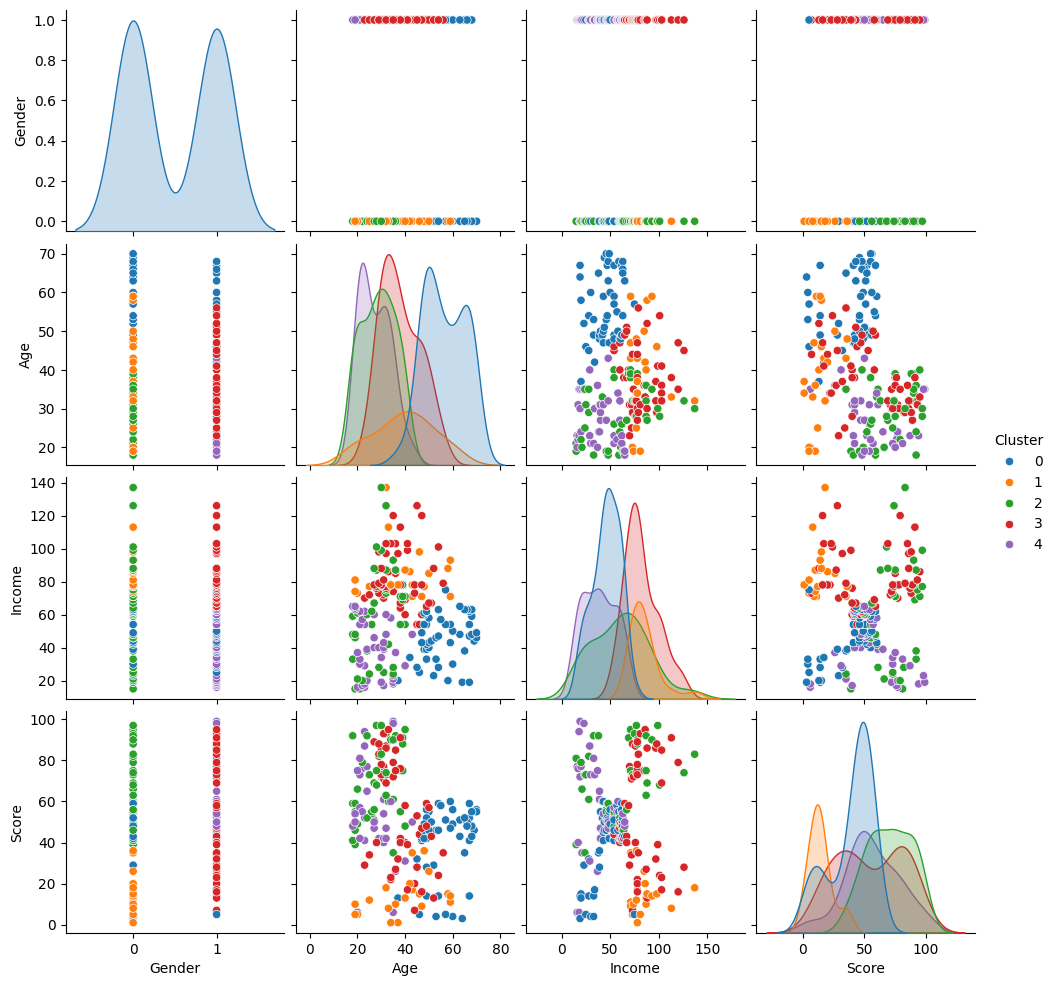

In [23]:
# 7. Train KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# 8. Visualize clusters
sns.pairplot(df, hue='Cluster', palette='tab10')
plt.show()

In [24]:
# 9. Cluster analysis
for i in range(5):
    print(f"Cluster {i}:\n", df[df['Cluster'] == i].describe(), "\n")

# 10. Save results
df.to_csv('segmented_customers.csv', index=False)

Cluster 0:
           Gender        Age     Income      Score  Cluster
count  51.000000  51.000000  51.000000  51.000000     51.0
mean    0.490196  56.470588  46.098039  39.313725      0.0
std     0.504878   8.582198  14.006077  17.324538      0.0
min     0.000000  37.000000  19.000000   3.000000      0.0
25%     0.000000  49.000000  38.500000  30.500000      0.0
50%     0.000000  55.000000  47.000000  46.000000      0.0
75%     1.000000  65.000000  57.500000  51.500000      0.0
max     1.000000  70.000000  75.000000  60.000000      0.0 

Cluster 1:
        Gender        Age      Income      Score  Cluster
count    20.0  20.000000   20.000000  20.000000     20.0
mean      0.0  39.500000   85.150000  14.050000      1.0
std       0.0  12.550949   16.030481   9.566801      0.0
min       0.0  19.000000   71.000000   1.000000      1.0
25%       0.0  32.750000   76.250000   8.750000      1.0
50%       0.0  41.000000   79.500000  12.500000      1.0
75%       0.0  47.250000   87.250000  17.250

## Conclusion

- Customers were successfully segmented into distinct clusters.
- These clusters provide insight into customer behavior and spending patterns.
- Businesses can now target promotions and offerings based on customer group profiles.

This clustering-based segmentation is an effective foundation for data-driven marketing strategies.
